## Case Study - Beauty in the Classroom

### Inspect the data
The purpose of this chapter is to give you an opportunity to apply and practice what you've learned on a real world dataset. For this reason, we'll provide a little less guidance than usual.
The data from the study described in the video are available in your workspace as evals. Let's take a look!

Inspect the evals data frame using techniques you learned in previous chapters. Use an approach that shows you how many observations and variables are included in the dataset.

In [25]:
library(ggplot2)

In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Load Evals.RData File

In [4]:
load('f:/datasets/evals.RData')

In [5]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color


## Identify variable types
It's always useful to start your exploration of a dataset by identifying variable types. The results from this exercise will help you design appropriate visualizations and calculate useful summary statistics later in your analysis.

- Explore the evals data once again with the following goals in mind: (1) Identify each variable as numerical or categorical. (2) If numerical, determine if it is discrete or continuous. (3) If categorical, determine if it is ordinal or not.

- We've created a vector of variable names in the editor called cat_vars. To test your understanding of the data, remove the names of any variables that are not categorical.

In [7]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

In [8]:
# Remove non-factor variables from the vector below
cat_vars <- c("score", "rank", "ethnicity", "gender", "language", "age",
              "cls_students", "cls_level", "cls_profs", "cls_credits",
              "bty_avg", "pic_outfit", "pic_color")

In [9]:
cat_vars

[1] "score"        "rank"         "ethnicity"    "gender"       "language"    
 [6] "age"          "cls_students" "cls_level"    "cls_profs"    "cls_credits" 
[11] "bty_avg"      "pic_outfit"   "pic_color"

In [12]:
length(cat_vars)

[1] 13

In [20]:
cat_vars<-cat_vars[-(c(1,6,7, 11))]

In [21]:
cat_vars

[1] "rank"        "ethnicity"   "gender"      "language"    "cls_level"  
[6] "cls_profs"   "cls_credits" "pic_outfit"  "pic_color"

## Recode a variable
The cls_students variable in evals tells you the number of students in the class. Suppose instead of the exact number of students, you're interested in whether the class is 
"small" (18 students or fewer), 
"midsize" (19 - 59 students), or 
"large" (60 students or more).

- Recode the cls_students variable into a new variable, cls_type, using case_when(). This new variable should have three levels as described above. save the resulting data frame (with the new variable) as evals. 

- What type of variable is cls_type?

In [23]:
evals<-evals %>% mutate(cls_type = case_when(
    cls_students <= 18 ~ "small",
    cls_students >=19 & cls_students <= 59 ~ "midsize",
    cls_students >= 60 ~ "large"
    )
                       )

Excellent! The cls_type variable is a categorical variable, stored as a character vector. You could have made it a factor variable by wrapping the nested ifelse() statements inside factor(). You don't have to do that now. Let's move on! 

In [24]:
evals %>% select(cls_students, cls_type)

cls_students,cls_type
43,midsize
125,large
125,large
123,large
20,midsize
40,midsize
44,midsize
55,midsize
195,large
46,midsize


### Create a scatterplot
The bty_avg variable shows the average beauty rating of the professor by the six students who were asked to rate the attractiveness of these faculty. The score variable shows the average professor evaluation score, with 1 being very unsatisfactory and 5 being excellent.

- Use ggplot() to create a scatterplot displaying the relationship between these two variables. 
- How would you describe the relationship apparent in this visualization?

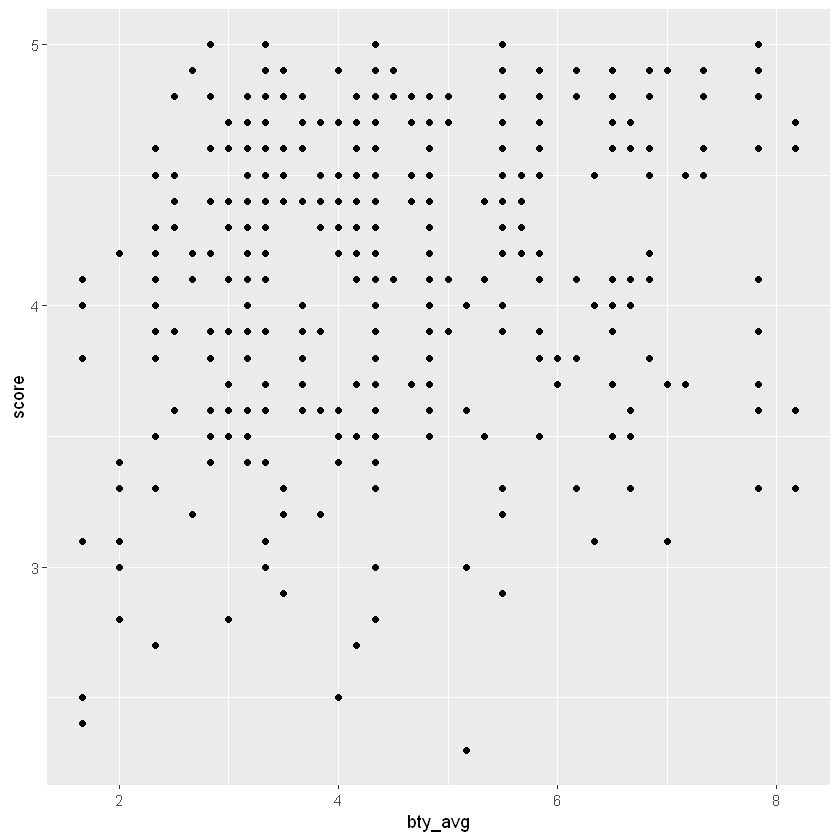

In [26]:
ggplot(evals, aes(x=bty_avg, y=score)) + geom_point()

## Create a scatterplot, with an added layer
Suppose you are interested in evaluating how the relationship between a professor's attractiveness and their evaluation score varies across different class types (small, midsize, and large).

- Recreate your visualization from the previous exercise, but this time coloring the points by class type.
- How would you describe the relationship apparent in this visualization?

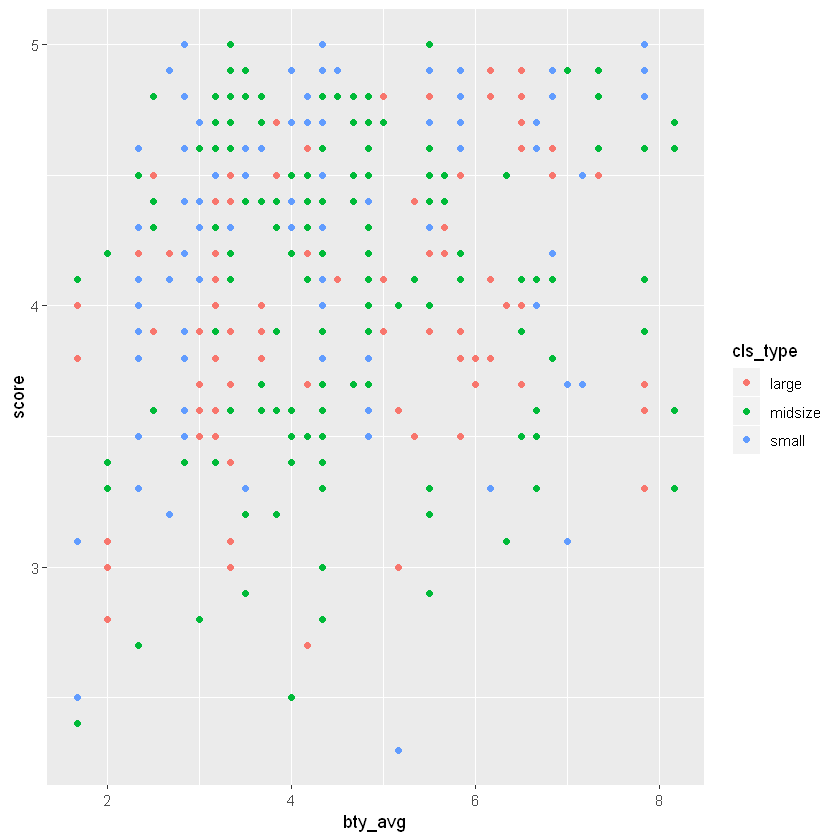

In [27]:
ggplot(evals, aes(x=bty_avg, y=score, color=cls_type)) + geom_point()